In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros/main/3%20-%20EDA/dados_carros_categorias_com_outliers.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,marca,modelo,motor,ano,quilometragem,novo,preco
0,volkswagem,Fox,1.0,2013,100000,0,114900
1,citroen,C3,1.4,2012,71000,0,29990
2,volkswagem,Fox,1.0,2013,84000,0,23990
3,ford,Ka,1.0,2019,10800,0,28990
4,hyundai,Hb20,1.0,2017,23000,0,47879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12202 entries, 0 to 12201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          12202 non-null  object 
 1   modelo         12202 non-null  object 
 2   motor          11652 non-null  float64
 3   ano            12202 non-null  int64  
 4   quilometragem  12202 non-null  int64  
 5   novo           12202 non-null  int64  
 6   preco          12202 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 667.4+ KB


 - Excluindo os valores ausentes.

In [6]:
df.shape

(12202, 7)

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

marca            0
modelo           0
motor            0
ano              0
quilometragem    0
novo             0
preco            0
dtype: int64

 - Observando outliers

In [9]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,11652.0,1.86,0.57,1.000000e+00,1.5,1.8,2.30,6.7
ano,11652.0,2125.24,6904.33,1.991000e+03,2011.0,2015.0,2019.00,436662.0
quilometragem,11652.0,2924.41,20561745.34,-1.981284e+09,400.0,75000.0,125504.75,999999999.0
novo,11652.0,0.19,0.39,0.000000e+00,0.0,0.0,0.00,1.0
preco,11652.0,78520.68,374880.63,1.000000e+03,32900.0,56444.5,97900.00,39900000.0


In [10]:
df.query('motor == 6.7')

,marca,modelo,motor,ano,quilometragem,novo,preco
1716,dodge,Ram,6.7,2012,94500,0,200000
2475,dodge,Ram,6.7,2020,1030,0,52999
4372,dodge,Ram,6.7,2012,108500,0,20000
5123,dodge,Ram,6.7,2018,50000,0,89990
5887,dodge,Ram,6.7,2018,29860,0,140000


In [11]:
df.query('quilometragem == 999999999 ')

,marca,modelo,motor,ano,quilometragem,novo,preco
12193,chevrolet,Zafira,2.0,2001,999999999,0,15000


In [12]:
df.query('ano == 436662')

,marca,modelo,motor,ano,quilometragem,novo,preco
3703,fiat,Ducato,2.3,436662,136000,0,46000
4842,fiat,Ducato,2.3,436662,136000,0,55000


In [13]:
df.query('preco == 39900000')

,marca,modelo,motor,ano,quilometragem,novo,preco
1216,nissan,Versa,1.6,2014,86000,0,39900000


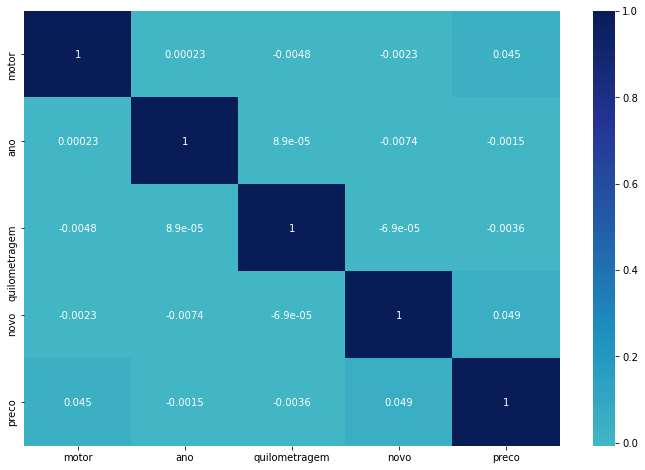

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), center = 0, annot = True,cmap="YlGnBu"  )

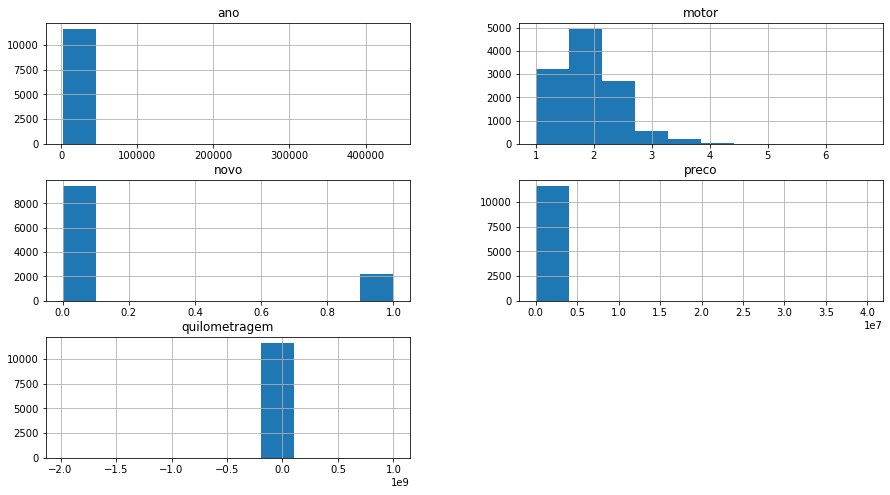

In [55]:
df.hist(figsize=(15,8))
plt.show()

## Criando um df_filtrado

 - Estabelecendo um filtro pro preço

In [35]:
df_filtrado = df[df['preco'] <= 200000.0]

 - Estabelecendo um filtro para o ano máximo

In [51]:
df.ano.value_counts()

2021      1587
2020      1021
2014       953
2013       905
2012       821
2019       738
2018       722
2015       722
2011       686
2016       588
2010       539
2017       485
2008       397
2009       372
2007       259
2006       189
2005       182
2004        99
2001        83
2003        75
2002        64
2000        58
1999        48
1998        23
2022        11
1997         7
1995         6
1996         5
436662       2
1994         2
1993         1
1991         1
423566       1
Name: ano, dtype: int64

In [36]:
df_filtrado = df_filtrado[df_filtrado['ano'] <= 2021]

In [37]:
df_filtrado = df_filtrado[df_filtrado['quilometragem'] <= 250000]

In [38]:
df_filtrado.describe().round(2)

,motor,ano,quilometragem,novo,preco
count,10849.00,10849.00,10849.00,10849.00,10849.00
mean,1.83,2014.58,73593.82,0.19,69110.03
std,0.56,5.11,63857.34,0.40,47199.82
min,1.00,1991.00,0.00,0.00,1000.00
25%,1.50,2011.00,176.00,0.00,32000.00
50%,1.80,2015.00,70100.00,0.00,54888.00
75%,2.20,2019.00,119200.00,0.00,91990.00
max,6.70,2021.00,250000.00,1.00,200000.00


In [39]:
df_filtrado.quilometragem.max()

250000

In [40]:
df_filtrado.preco.value_counts()

159900    129
151900    119
29900      71
31900      70
34900      68
         ... 
60800       1
71400       1
17505       1
62851       1
53250       1
Name: preco, Length: 2154, dtype: int64

In [41]:
df_filtrado.shape

(10849, 7)

 - Podemos observar que a distribuição dos dados melhorou após realizar alguns filtros no df.

In [69]:
df_filtrado.describe().round(2)

,motor,ano,quilometragem,novo,preco
count,10849.00,10849.00,10849.00,10849.00,10849.00
mean,1.83,2014.58,73593.82,0.19,69110.03
std,0.56,5.11,63857.34,0.40,47199.82
min,1.00,1991.00,0.00,0.00,1000.00
25%,1.50,2011.00,176.00,0.00,32000.00
50%,1.80,2015.00,70100.00,0.00,54888.00
75%,2.20,2019.00,119200.00,0.00,91990.00
max,6.70,2021.00,250000.00,1.00,200000.00


In [70]:
df_filtrado.corr()

,motor,ano,quilometragem,novo,preco
motor,1.000000,-0.104862,0.055815,0.004023,0.319021
ano,-0.104862,1.000000,-0.623508,0.538051,0.476394
quilometragem,0.055815,-0.623508,1.000000,-0.566818,-0.333762
novo,0.004023,0.538051,-0.566818,1.000000,0.436504
preco,0.319021,0.476394,-0.333762,0.436504,1.000000


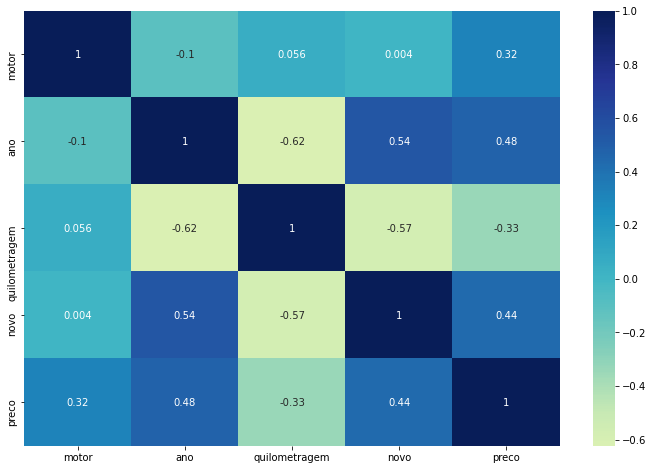

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(df_filtrado.corr(), center = 0, annot = True,cmap="YlGnBu"  )

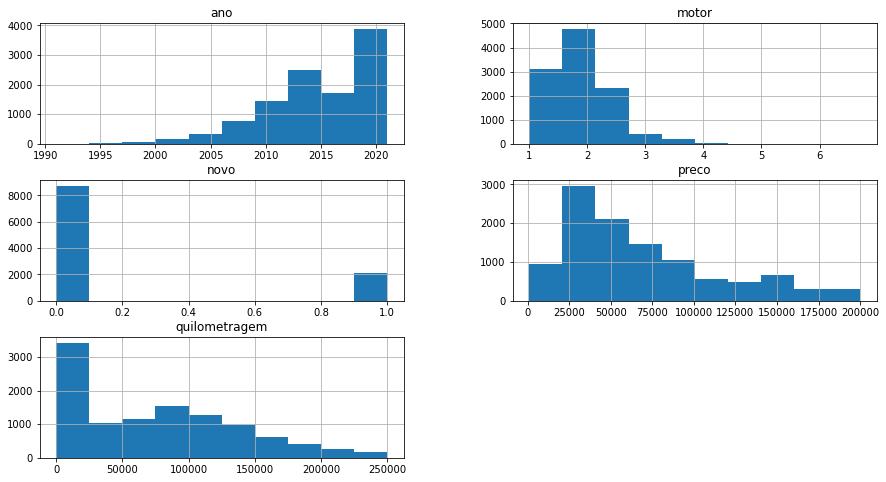

In [57]:
df_filtrado.hist(figsize=(15,8))
plt.show()

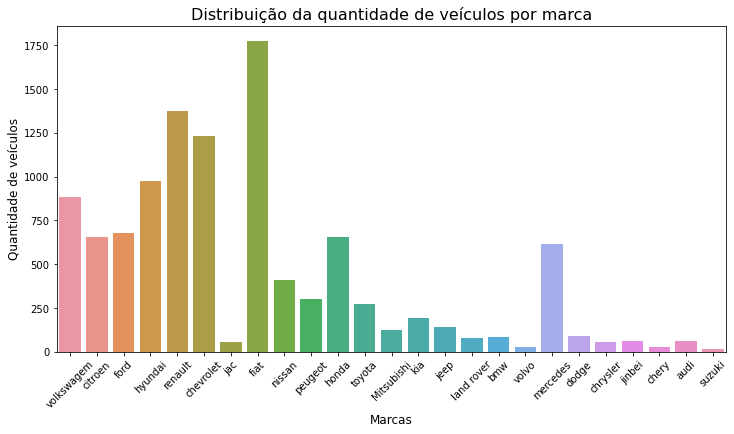

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(x = df_filtrado['marca'],data = df_filtrado)
plt.title('Distribuição da quantidade de veículos por marca', fontsize = 16)
plt.xlabel('Marcas', fontsize = 12)
plt.ylabel('Quantidade de veículos', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

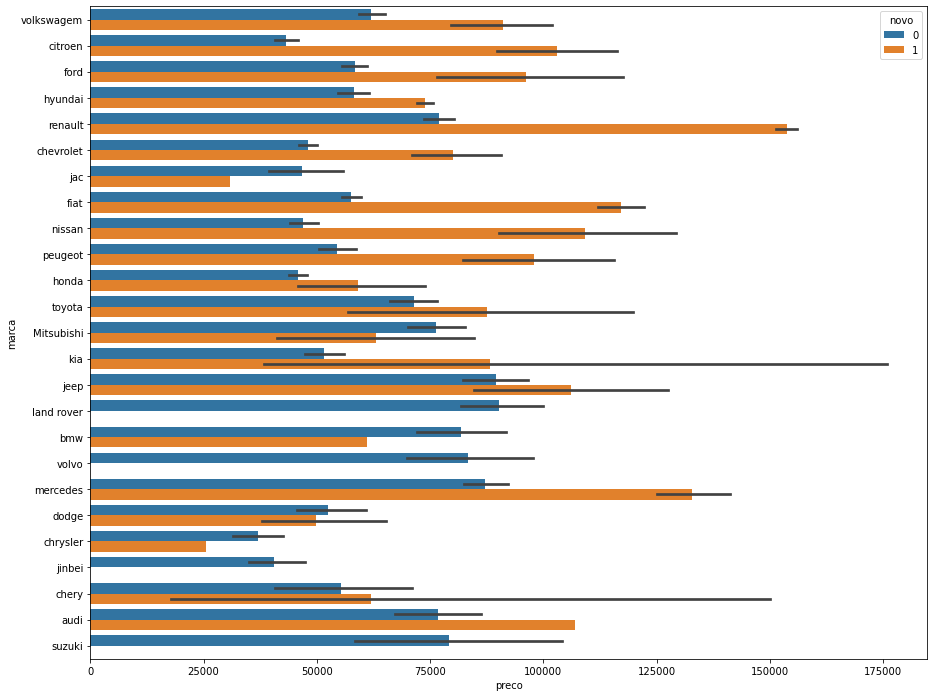

In [74]:
plt.figure(figsize = (15,12))
sns.barplot(y = 'marca', x = 'preco', hue  = 'novo' , data = df_filtrado )

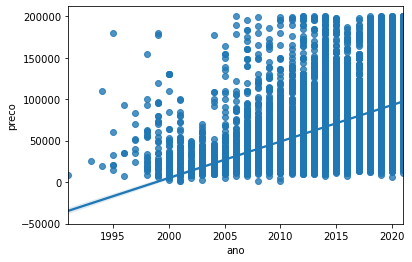

In [80]:
sns.regplot('ano','preco', data = df_filtrado)

C:\Users\Biena\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


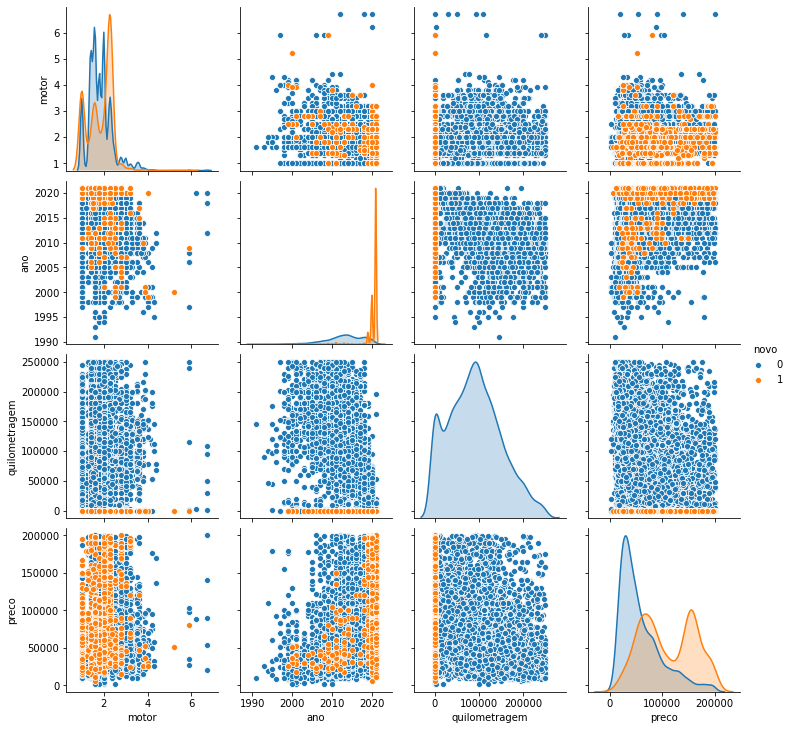

In [78]:
sns.pairplot(df_filtrado , hue = 'novo')

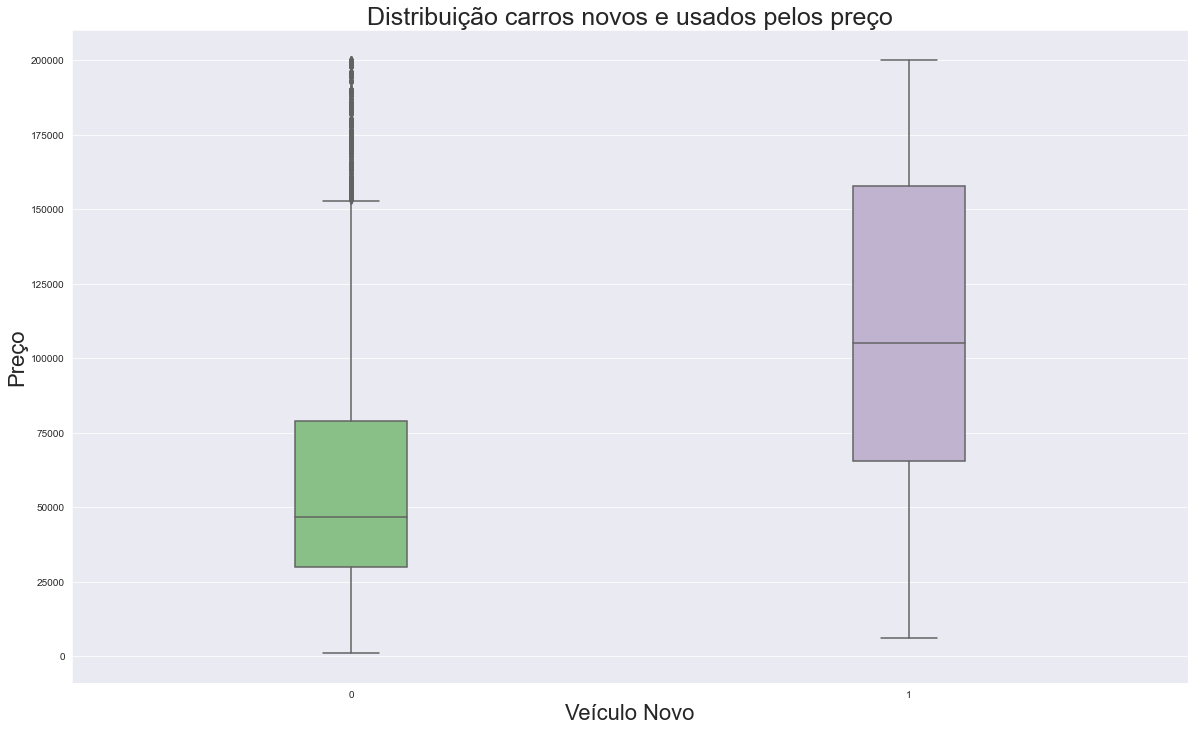

In [87]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='novo', y='preco', data=df_filtrado, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Distribuição carros novos e usados pelos preço', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Veículo Novo', fontsize=22)
ax

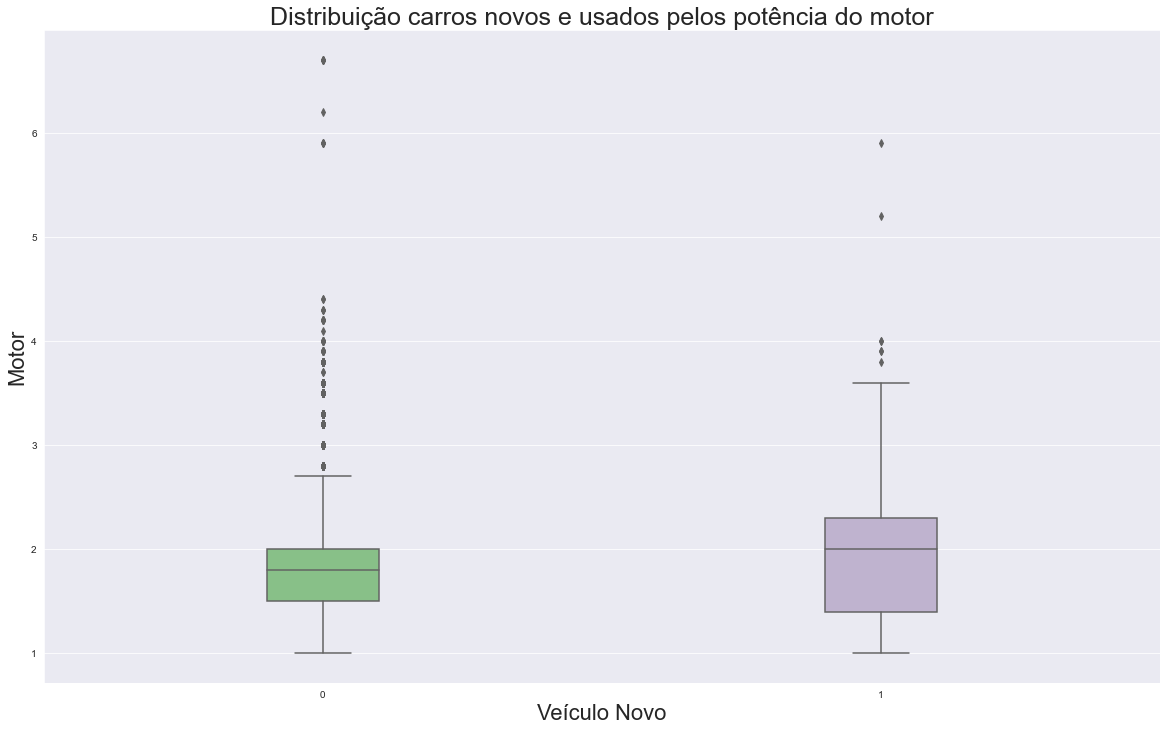

In [95]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='novo', y='motor', data=df_filtrado, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Distribuição carros novos e usados pelos potência do motor', fontsize=25)
ax.set_ylabel('Motor', fontsize=22)
ax.set_xlabel('Veículo Novo', fontsize=22)
ax

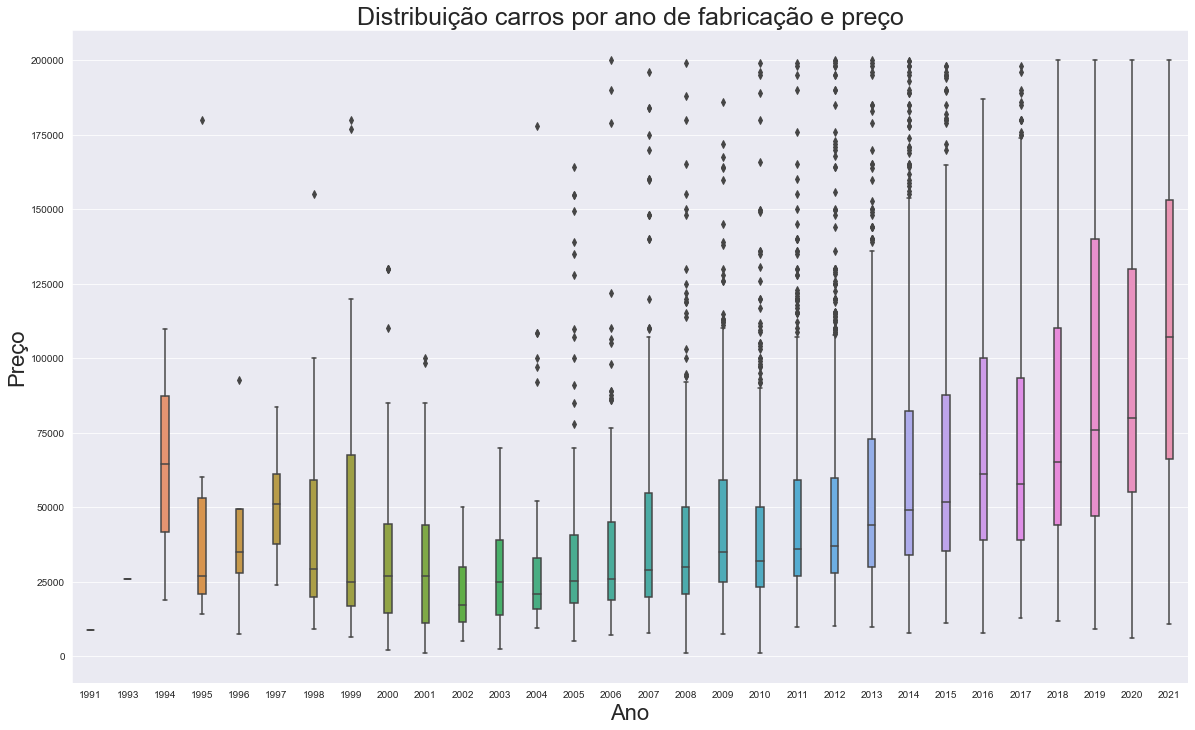

In [103]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='ano', y='preco', data=df_filtrado , orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Distribuição carros por ano de fabricação e preço', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Ano', fontsize=22)
ax

In [91]:
df_filtrado.columns

Index(['marca', 'modelo', 'motor', 'ano', 'quilometragem', 'novo', 'preco'], dtype='object')

Text(0.5, 1.15, 'Dispersão entre as variáveis')

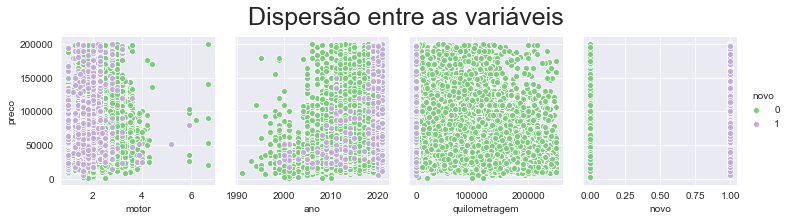

In [93]:
ax = sns.pairplot(data=df_filtrado,y_vars = 'preco', x_vars = ['motor', 'ano', 'quilometragem', 'novo'] , hue ='novo')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=25 ,y=1.15)

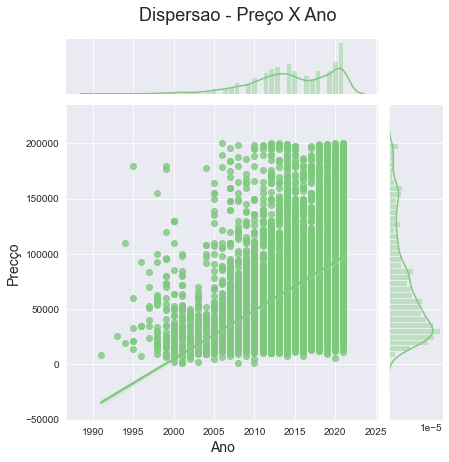

In [98]:
ax = sns.jointplot(x="ano", y="preco", data=df_filtrado, kind = 'reg')
ax.fig.suptitle('Dispersao - Preço X Ano', fontsize=18, y=1.05)
ax.set_axis_labels("Ano", "Precço", fontsize=14)
ax

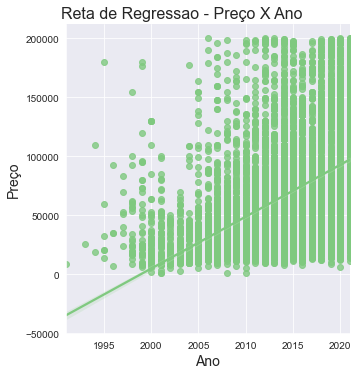

In [100]:
ax= sns.lmplot(x="ano", y="preco", data=df_filtrado)
ax.fig.suptitle('Reta de Regressao - Preço X Ano', fontsize=16, y=1.02)
ax.set_xlabels("Ano", fontsize=14)
ax.set_ylabels("Preço", fontsize=14)
ax

 - Salvando o Dataset sem outliers em um arquivo csv.

In [104]:
df_filtrado.to_csv('carros_ml_sem_outliers.csv',index =False , encoding = 'utf-8')